In [2]:
import numpy as np
from sympy import symbols, Matrix, simplify
import matplotlib.pyplot as plt
from pyscf import gto, scf
from scipy.linalg import fractional_matrix_power
from scipy.optimize import brentq
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')
import plottingsystem as pts
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel

In [3]:
benzene = huckel(6, 0, -3)
benzene.create_matrix()

H = benzene.huckel_matrix
print(H)

one_electron_operator = np.zeros((6, 6))
one_electron_operator[0,0] = 1
print(one_electron_operator)

[[ 0. -3.  0.  0.  0. -3.]
 [-3.  0. -3.  0.  0.  0.]
 [ 0. -3.  0. -3.  0.  0.]
 [ 0.  0. -3.  0. -3.  0.]
 [ 0.  0.  0. -3.  0. -3.]
 [-3.  0.  0.  0. -3.  0.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [4]:
potentials = np.linspace(-50, 50, 101)
print(potentials)


[-50. -49. -48. -47. -46. -45. -44. -43. -42. -41. -40. -39. -38. -37.
 -36. -35. -34. -33. -32. -31. -30. -29. -28. -27. -26. -25. -24. -23.
 -22. -21. -20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.
  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.
   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.
  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.
  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.  50.]


In [5]:
electron_population = [[],[],[],[],[],[]]
S_1_atom = []
S_2_atoms = []
for potential in potentials:
    benzene.huckel_matrix = H + potential*one_electron_operator
    print(benzene.huckel_matrix)
    print(H)
    benzene.solve_huckel_matrix()
    eigenvalues = benzene.eigenvalues
    eigenvectors = benzene.eigenvectors.T
    print(eigenvectors)
    D_huckel = pts.making_D(eigenvectors.T, 6)
    for index, density in enumerate(np.diag(D_huckel)):
        electron_population[index].append(density)
    
    occ_orbitals = eigenvectors[:3].round(6)
    S_ohm_1_atom= []
    S_ohm_2_atoms = []
    for i in range(6):
        atom_i = np.zeros((6,6))
        atom_i[i][i] = 1
        eigvals_i = np.linalg.eigvalsh(occ_orbitals @ atom_i @ occ_orbitals.T).round(6)
        S_ohm_i = 0
        for eigenvalue in eigvals_i:
            if (eigenvalue != 0): 
                S_ohm_i -= (eigenvalue*np.log(eigenvalue) + (1-eigenvalue)*np.log(1-eigenvalue))
        S_ohm_1_atom.append(2*S_ohm_i)
        for j in range(i+1,6):
            atom_j = np.zeros((6,6))
            atom_j[j][j] = 1    
            atom_i_j = atom_i + atom_j
            eigvals_i_j = np.linalg.eigvalsh(occ_orbitals @ atom_i_j @ occ_orbitals.T).round(6)
            S_ohm_i_j = 0
            for eigenvalue in eigvals_i_j:
                if (eigenvalue != 0): 
                    S_ohm_i_j -= (eigenvalue*np.log(eigenvalue) + (1-eigenvalue)*np.log(1-eigenvalue))
            S_ohm_2_atoms.append(2*S_ohm_i_j)
    S_1_atom.append(S_ohm_1_atom)
    S_2_atoms.append(S_ohm_2_atoms)
print(S_1_atom)
print(electron_population[0])
print(S_2_atoms)

[[-50.  -3.   0.   0.   0.  -3.]
 [ -3.   0.  -3.   0.   0.   0.]
 [  0.  -3.   0.  -3.   0.   0.]
 [  0.   0.  -3.   0.  -3.   0.]
 [  0.   0.   0.  -3.   0.  -3.]
 [ -3.   0.   0.   0.  -3.   0.]]
[[ 0. -3.  0.  0.  0. -3.]
 [-3.  0. -3.  0.  0.  0.]
 [ 0. -3.  0. -3.  0.  0.]
 [ 0.  0. -3.  0. -3.  0.]
 [ 0.  0.  0. -3.  0. -3.]
 [-3.  0.  0.  0. -3.  0.]]
[[-9.96431823e-01 -5.95730096e-02 -3.57399931e-03 -4.25999910e-04
  -3.57399931e-03 -5.95730096e-02]
 [-3.64319935e-02  2.72432044e-01  5.02561902e-01  5.87449876e-01
   5.02561902e-01  2.72432044e-01]
 [-0.00000000e+00 -5.00000080e-01 -4.99999903e-01 -0.00000000e+00
   4.99999903e-01  5.00000080e-01]
 [ 6.86809878e-02 -5.75073093e-01 -2.29419955e-02  5.76897878e-01
  -2.29419955e-02 -5.75073093e-01]
 [ 0.00000000e+00  5.00000080e-01 -4.99999903e-01  0.00000000e+00
   4.99999903e-01 -5.00000080e-01]
 [-3.28519942e-02  3.02527049e-01 -4.96882904e-01  5.67530880e-01
  -4.96882904e-01  3.02527049e-01]]
[[-49.  -3.   0.   0.   0.  -3.

[[ 0.83004485  0.34954692  0.16344894  0.11501504  0.16344894  0.34954692]
 [ 0.34928094 -0.08610798 -0.47904082 -0.63577823 -0.47904082 -0.08610798]
 [-0.         -0.49999988 -0.49999982 -0.          0.49999982  0.49999988]
 [ 0.39293293 -0.49252988 -0.14324895  0.56514821 -0.14324895 -0.49252988]
 [ 0.          0.49999988 -0.49999982  0.          0.49999982 -0.49999988]
 [ 0.18609697 -0.35751492  0.47252983 -0.51299619  0.47252983 -0.35751492]]
[[-5. -3.  0.  0.  0. -3.]
 [-3.  0. -3.  0.  0.  0.]
 [ 0. -3.  0. -3.  0.  0.]
 [ 0.  0. -3.  0. -3.  0.]
 [ 0.  0.  0. -3.  0. -3.]
 [-3.  0.  0.  0. -3.  0.]]
[[ 0. -3.  0.  0.  0. -3.]
 [-3.  0. -3.  0.  0.  0.]
 [ 0. -3.  0. -3.  0.  0.]
 [ 0.  0. -3.  0. -3.  0.]
 [ 0.  0.  0. -3.  0. -3.]
 [-3.  0.  0.  0. -3.  0.]]
[[ 0.78337886  0.375225    0.20144994  0.153507    0.20144994  0.375225  ]
 [ 0.40300393 -0.041674   -0.46384186 -0.63546499 -0.46384186 -0.041674  ]
 [-0.         -0.5        -0.49999985 -0.          0.49999985  0.5       

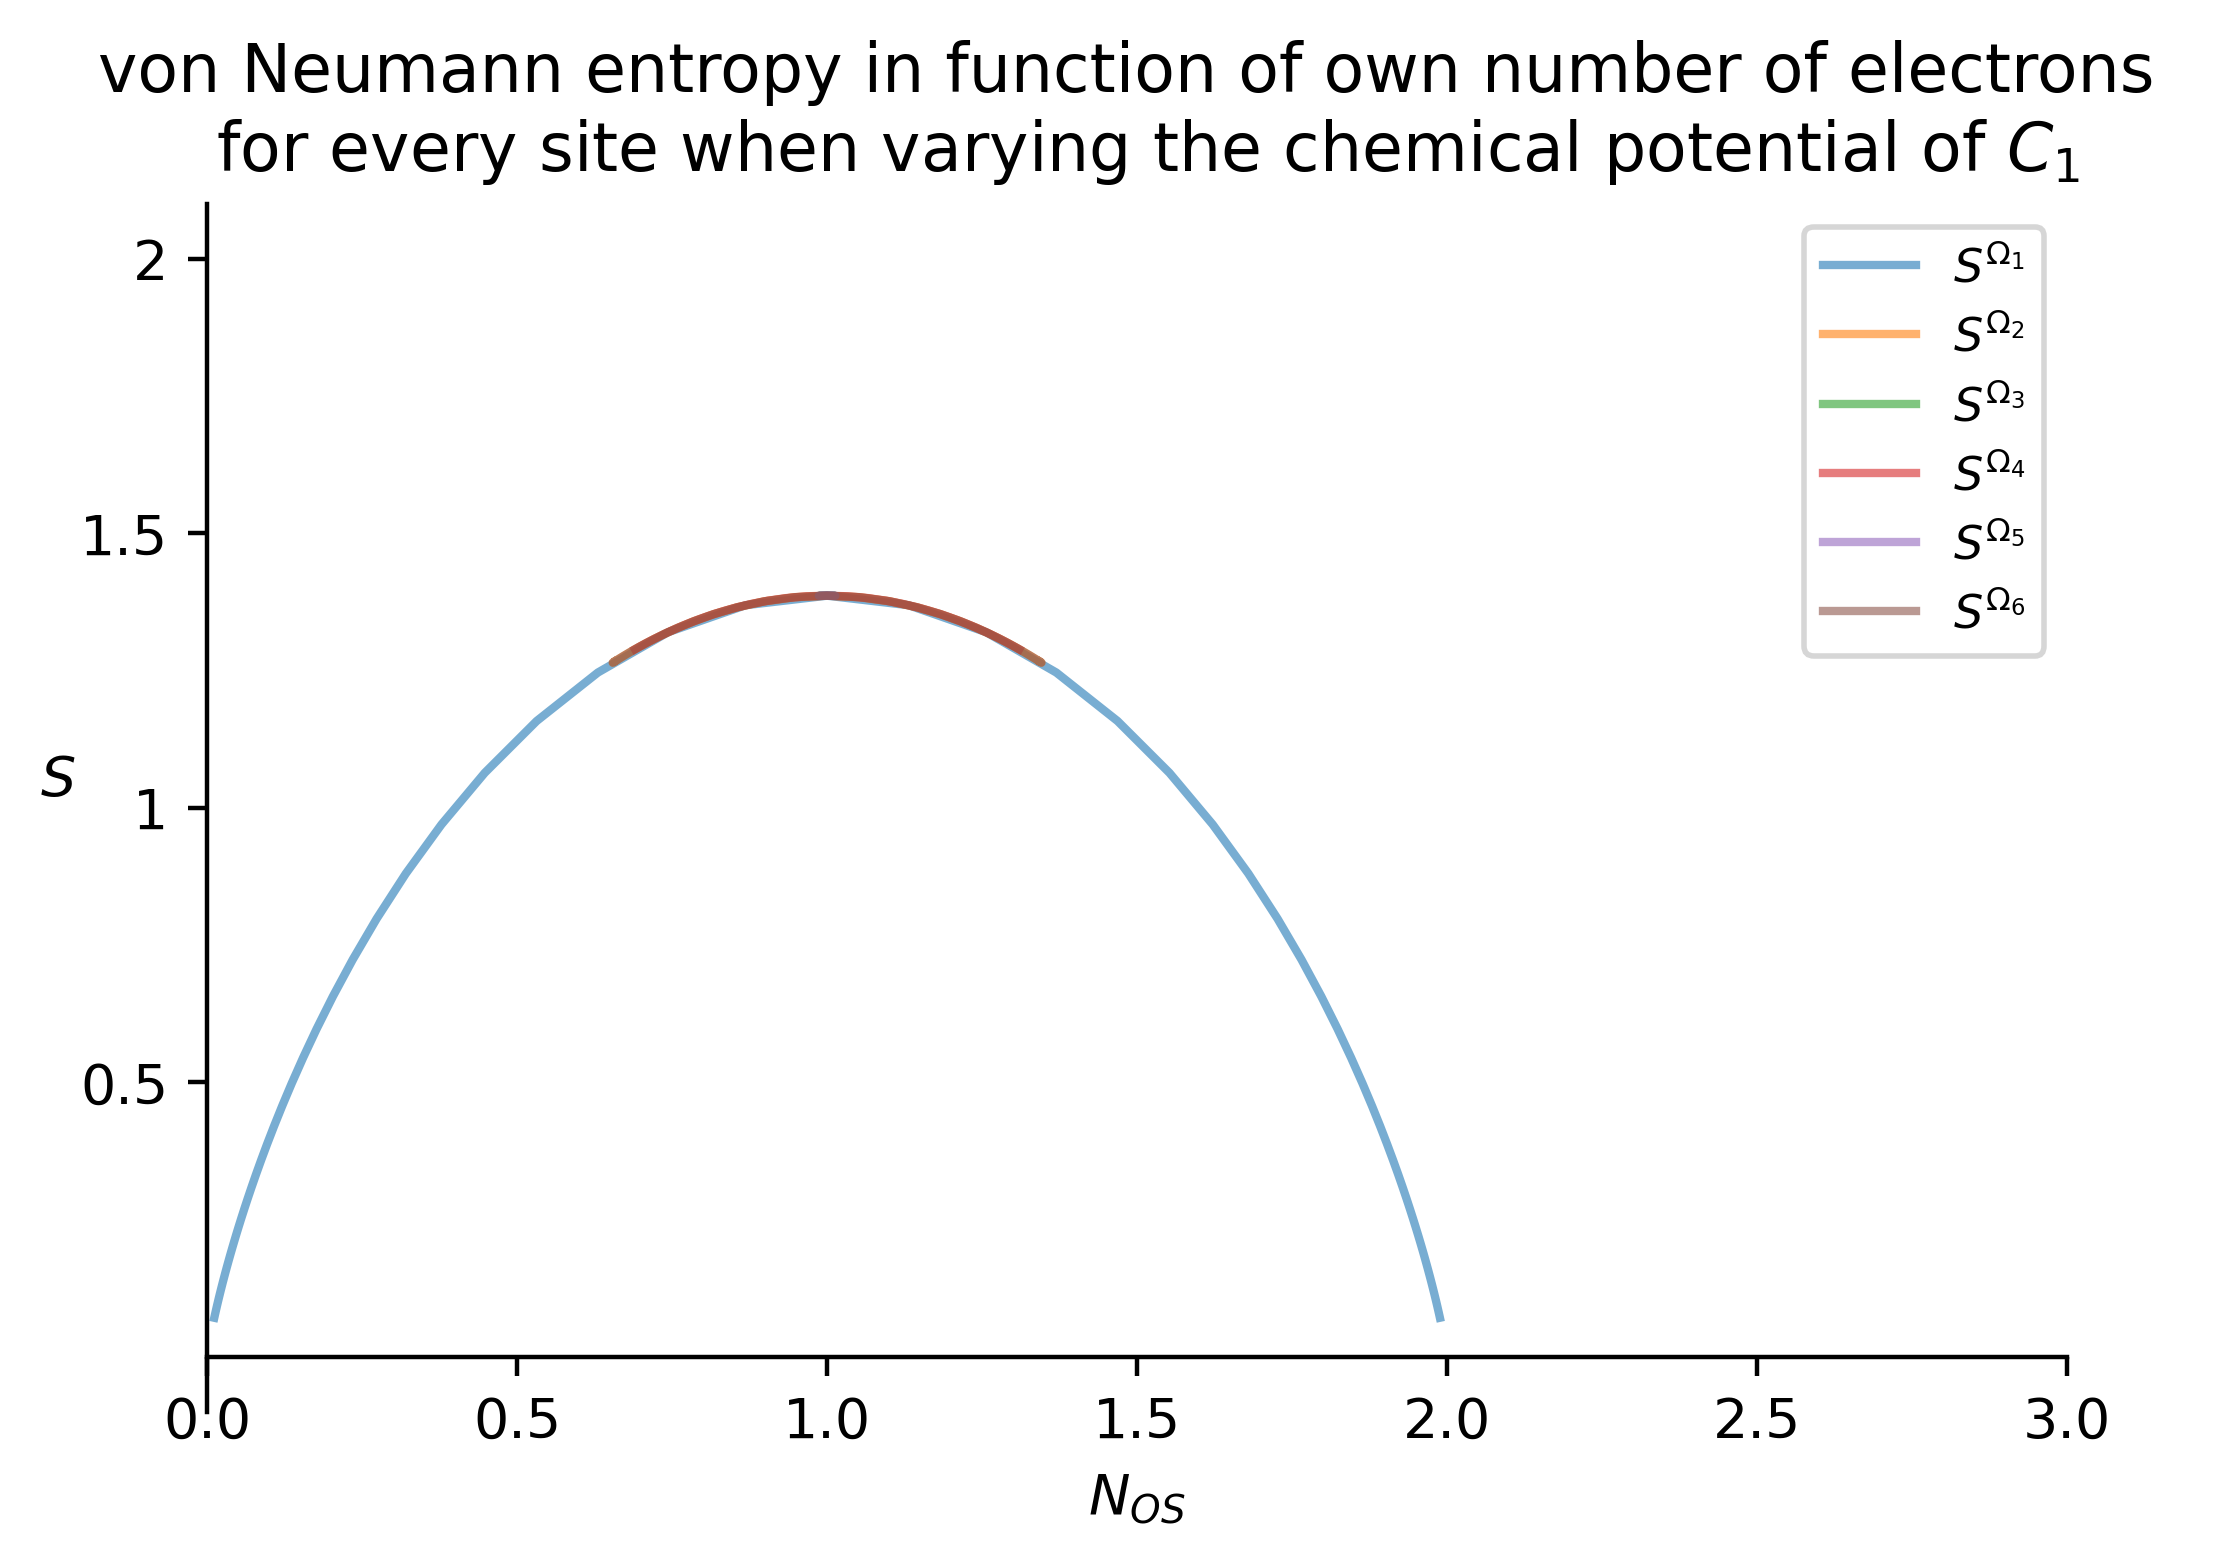

In [6]:
import matplotlib.pyplot as plt
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi= 400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(0, 3)
ax.set_ylim(-0.1, 2.1)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([0.5, 1, 1.5, 2])
ax.set_yticklabels(['0.5', '1', '1.5', '2'])


# Plot de gegevens
for index, population in enumerate(electron_population):
    plt.plot(population, [sublijst[index] for sublijst in S_1_atom], alpha = 0.6, label=r'$S^{Ω_{%s}}$' % str(index+1))

# Benoem de assen en titel 
plt.title('von Neumann entropy in function of own number of electrons \n for every site when varying the chemical potential of $C_1$')
ax.set_xlabel('$N_{OS}$')
ax.set_ylabel('$S$', rotation=0)

# Legenda
plt.legend(fontsize='small')

# Toon de plot
plt.show()


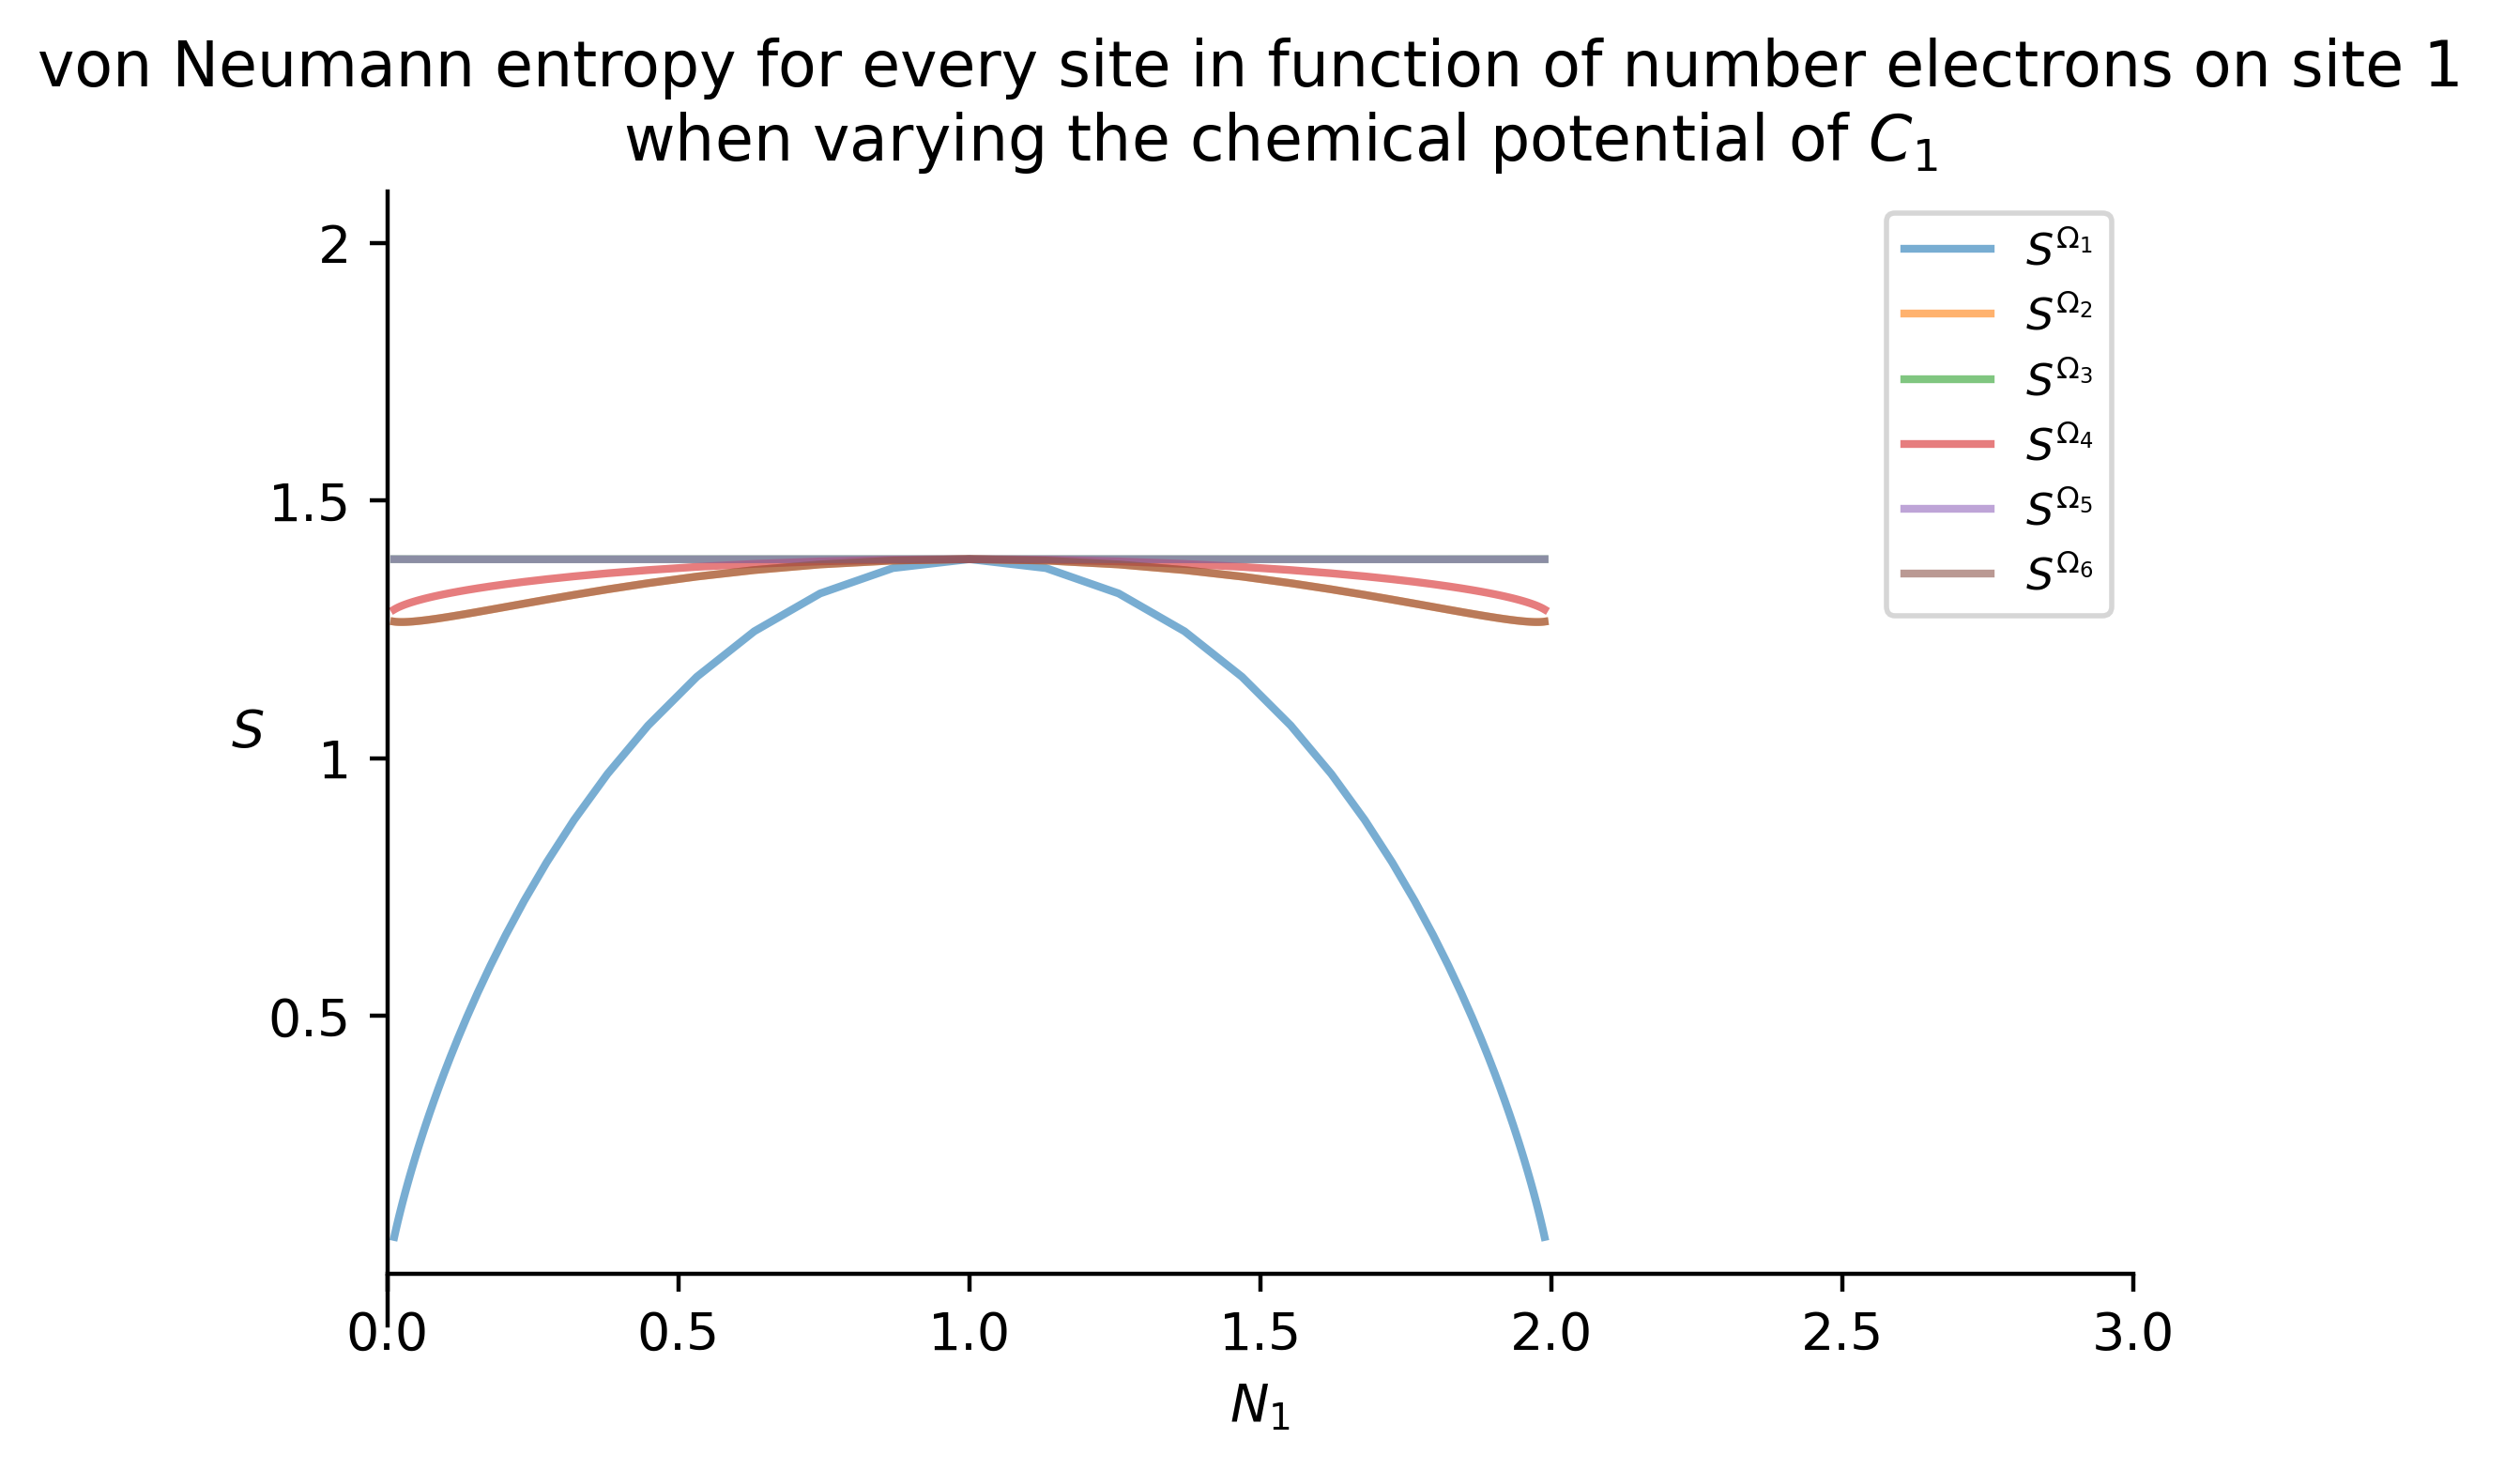

In [7]:
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi= 400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(0, 3)
ax.set_ylim(-0.1, 2.1)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([0.5, 1, 1.5, 2])
ax.set_yticklabels(['0.5', '1', '1.5', '2'])


# Plot de gegevens
for index in range(6):
    plt.plot(electron_population[0], [sublijst[index] for sublijst in S_1_atom], alpha = 0.6, label=r'$S^{Ω_{%s}}$' % str(index+1))
   
# Benoem de assen en titel 
plt.title('von Neumann entropy for every site in function of number electrons on site 1 \n  when varying the chemical potential of $C_1$')
ax.set_xlabel('$N_{1}$')
ax.set_ylabel('$S$', rotation=0)

# Legenda
plt.legend(fontsize='small')

# Toon de plot
plt.show()


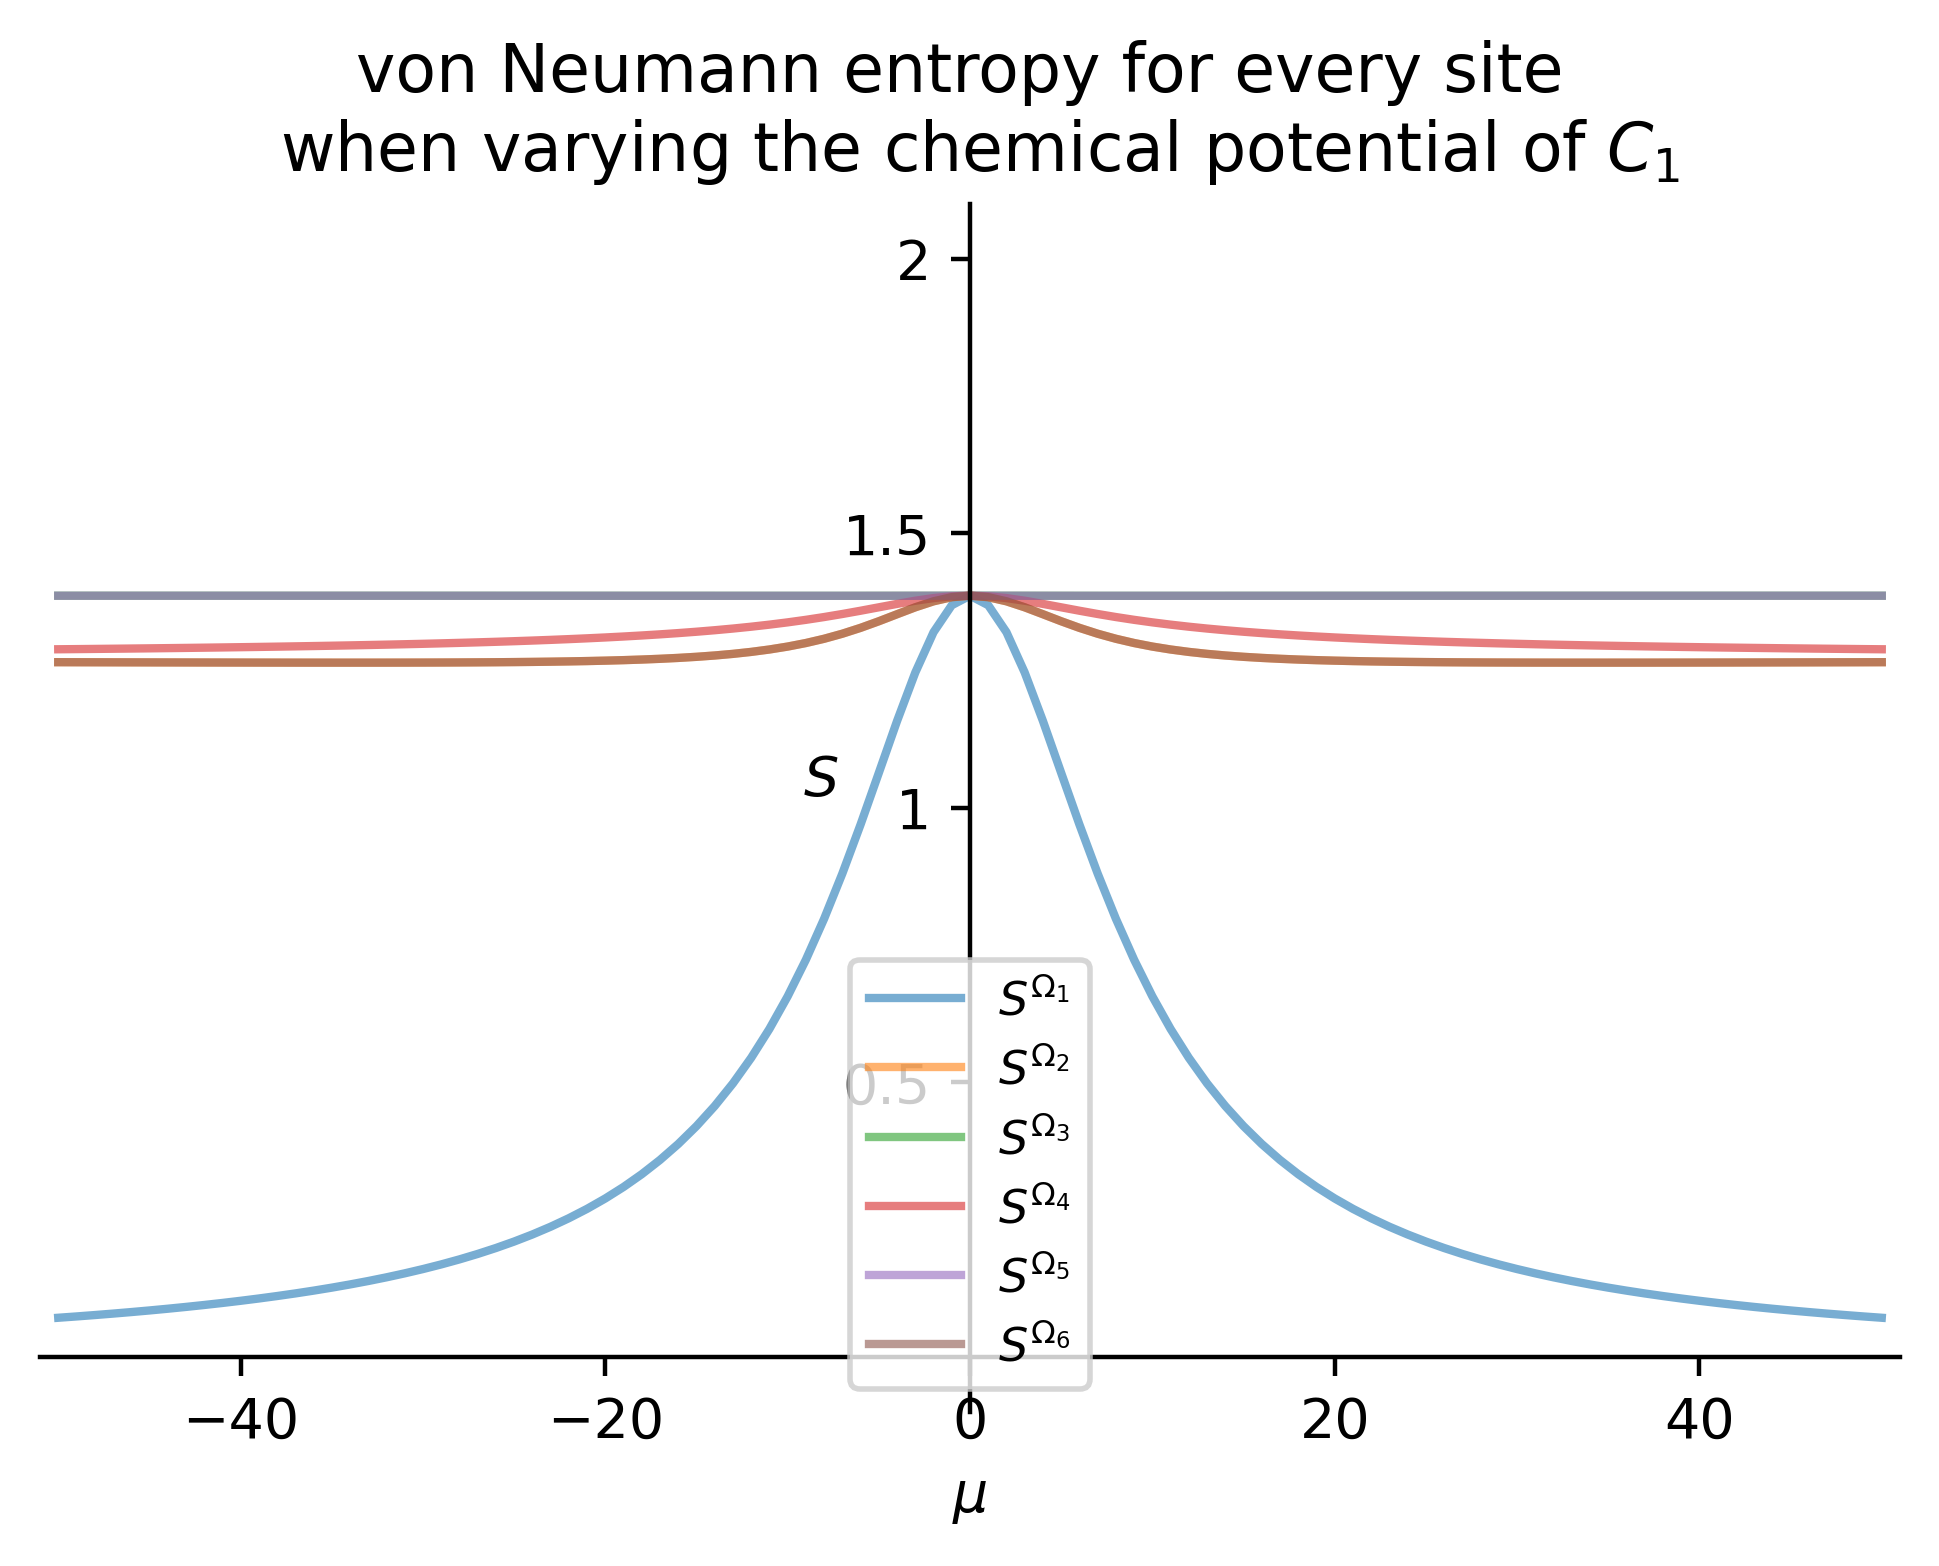

In [8]:


import matplotlib.pyplot as plt
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi= 400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-51, 51)
ax.set_ylim(-0.1, 2.1)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([0.5, 1, 1.5, 2])
ax.set_yticklabels(['0.5', '1', '1.5', '2'])


# Plot de gegevens
for i in range(6):
    plt.plot(potentials, [sublijst[i] for sublijst in S_1_atom], alpha = 0.6, label=r'$S^{Ω_{%s}}$' % str(i+1))

# Benoem de assen en titel 
plt.title('von Neumann entropy for every site \n when varying the chemical potential of $C_1$')
ax.set_xlabel('$\mu$')
ax.set_ylabel('$S$', rotation=0)

# Legenda
plt.legend(fontsize='small')

# Toon de plot
plt.show()


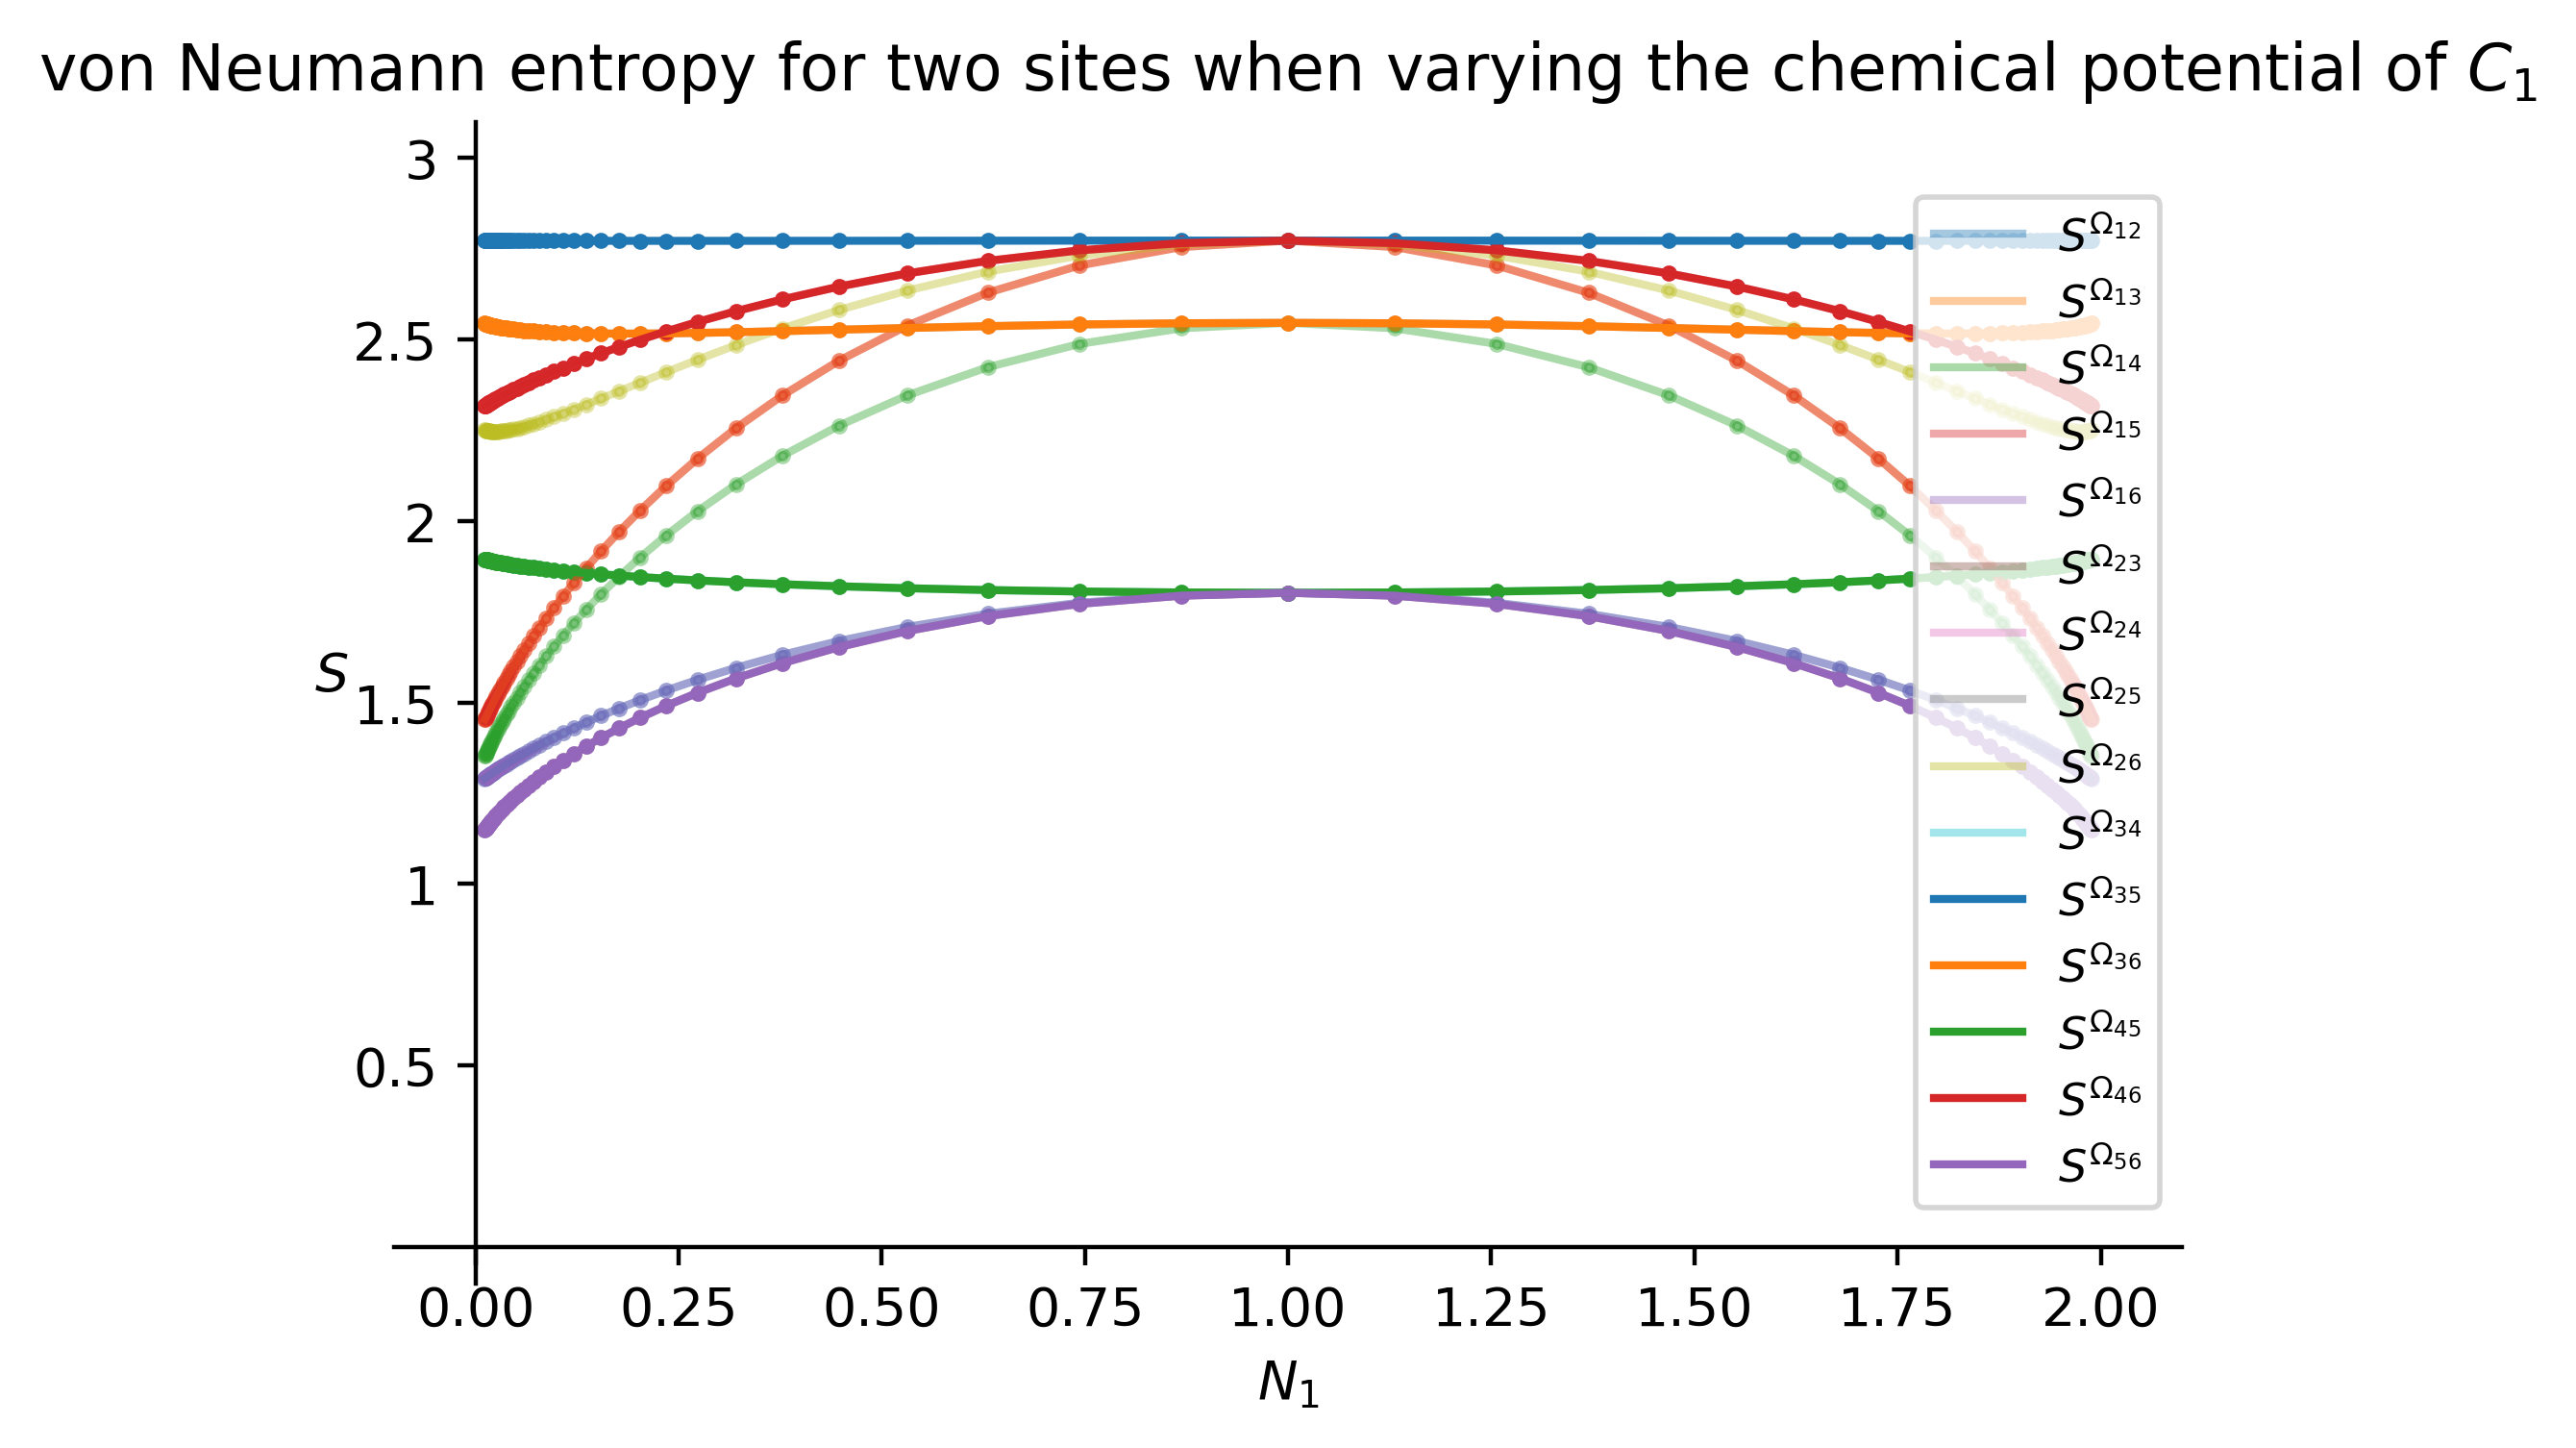

In [10]:


import matplotlib.pyplot as plt
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi= 400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-0.1, 2.1)
ax.set_ylim(-0.1, 3.1)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([0.5, 1, 1.5, 2, 2.5, 3])
ax.set_yticklabels(['0.5', '1', '1.5', '2', '2.5', '3'])


# Plot de gegevens
index = 0
for i in range(6):
    for j in range(i+1, 6):
        if index >9:
            alpha = 1
        else:
            alpha = 0.4
        atoms = str(i+1)+str(j+1)
        plt.plot(electron_population[0], [sublijst[index] for sublijst in S_2_atoms], alpha = alpha, label=r'$S^{Ω_{%s}}$' %atoms)
        plt.scatter(electron_population[0], [sublijst[index] for sublijst in S_2_atoms], s=4, alpha = alpha)
        index+=1
# Benoem de assen en titel 
plt.title('von Neumann entropy for two sites when varying the chemical potential of $C_1$')
ax.set_xlabel('$N_1$')
ax.set_ylabel('$S$', rotation=0)

# Legenda
plt.legend(fontsize='small',loc = 'right')

# Toon de plot
plt.show()


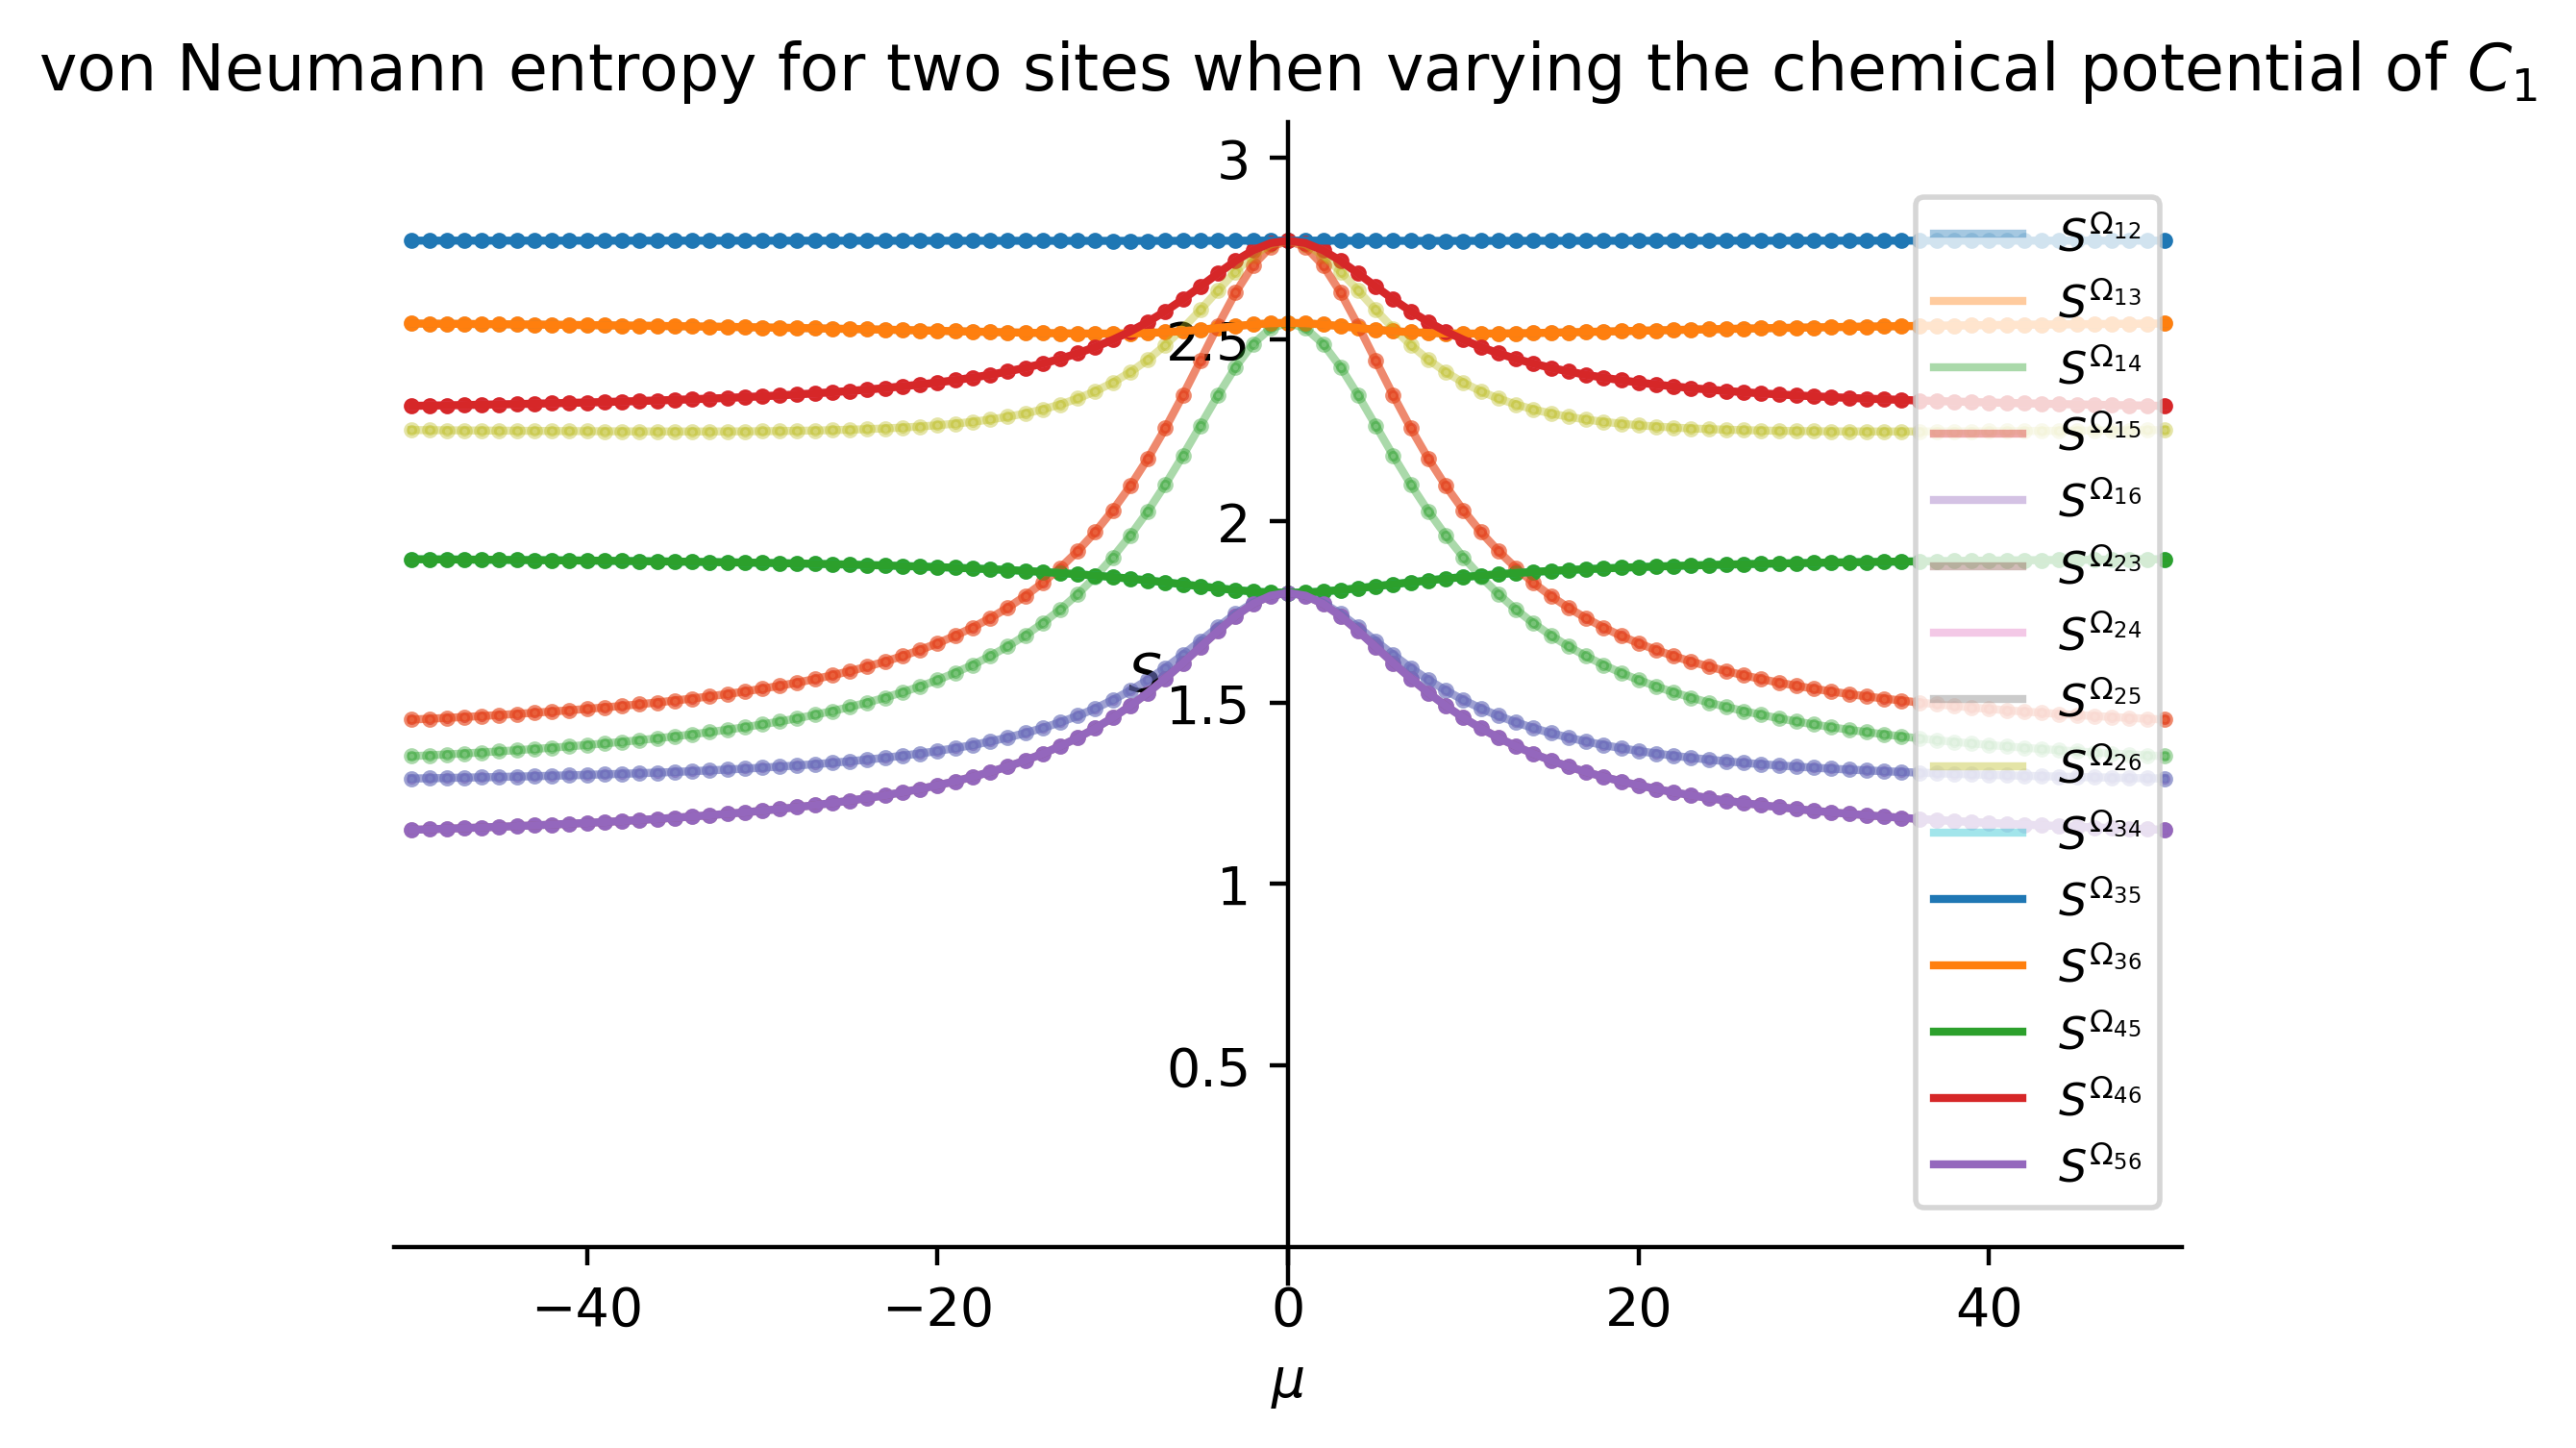

In [11]:


import matplotlib.pyplot as plt
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi= 400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-51, 51)
ax.set_ylim(-0.1, 3.1)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([0.5, 1, 1.5, 2, 2.5, 3])
ax.set_yticklabels(['0.5', '1', '1.5', '2', '2.5', '3'])


# Plot de gegevens
index = 0
for i in range(6):
    for j in range(i+1, 6):
        if index > 9:
            alpha = 1
        else:
            alpha = 0.4
        atoms = (str(i+1)+str(j+1))
        ax.plot(potentials, [sublijst[index] for sublijst in S_2_atoms], alpha=alpha, label=r'$S^{Ω_{%s}}$' % atoms)
        ax.scatter(potentials, [sublijst[index] for sublijst in S_2_atoms], s=4, alpha=alpha)
        index += 1
# Benoem de assen en titel 
plt.title('von Neumann entropy for two sites when varying the chemical potential of $C_1$')
ax.set_xlabel('$\mu$')
ax.set_ylabel('$S$', rotation=0)

# Legenda
plt.legend(fontsize='small',loc = 'right')

# Toon de plot
plt.show()


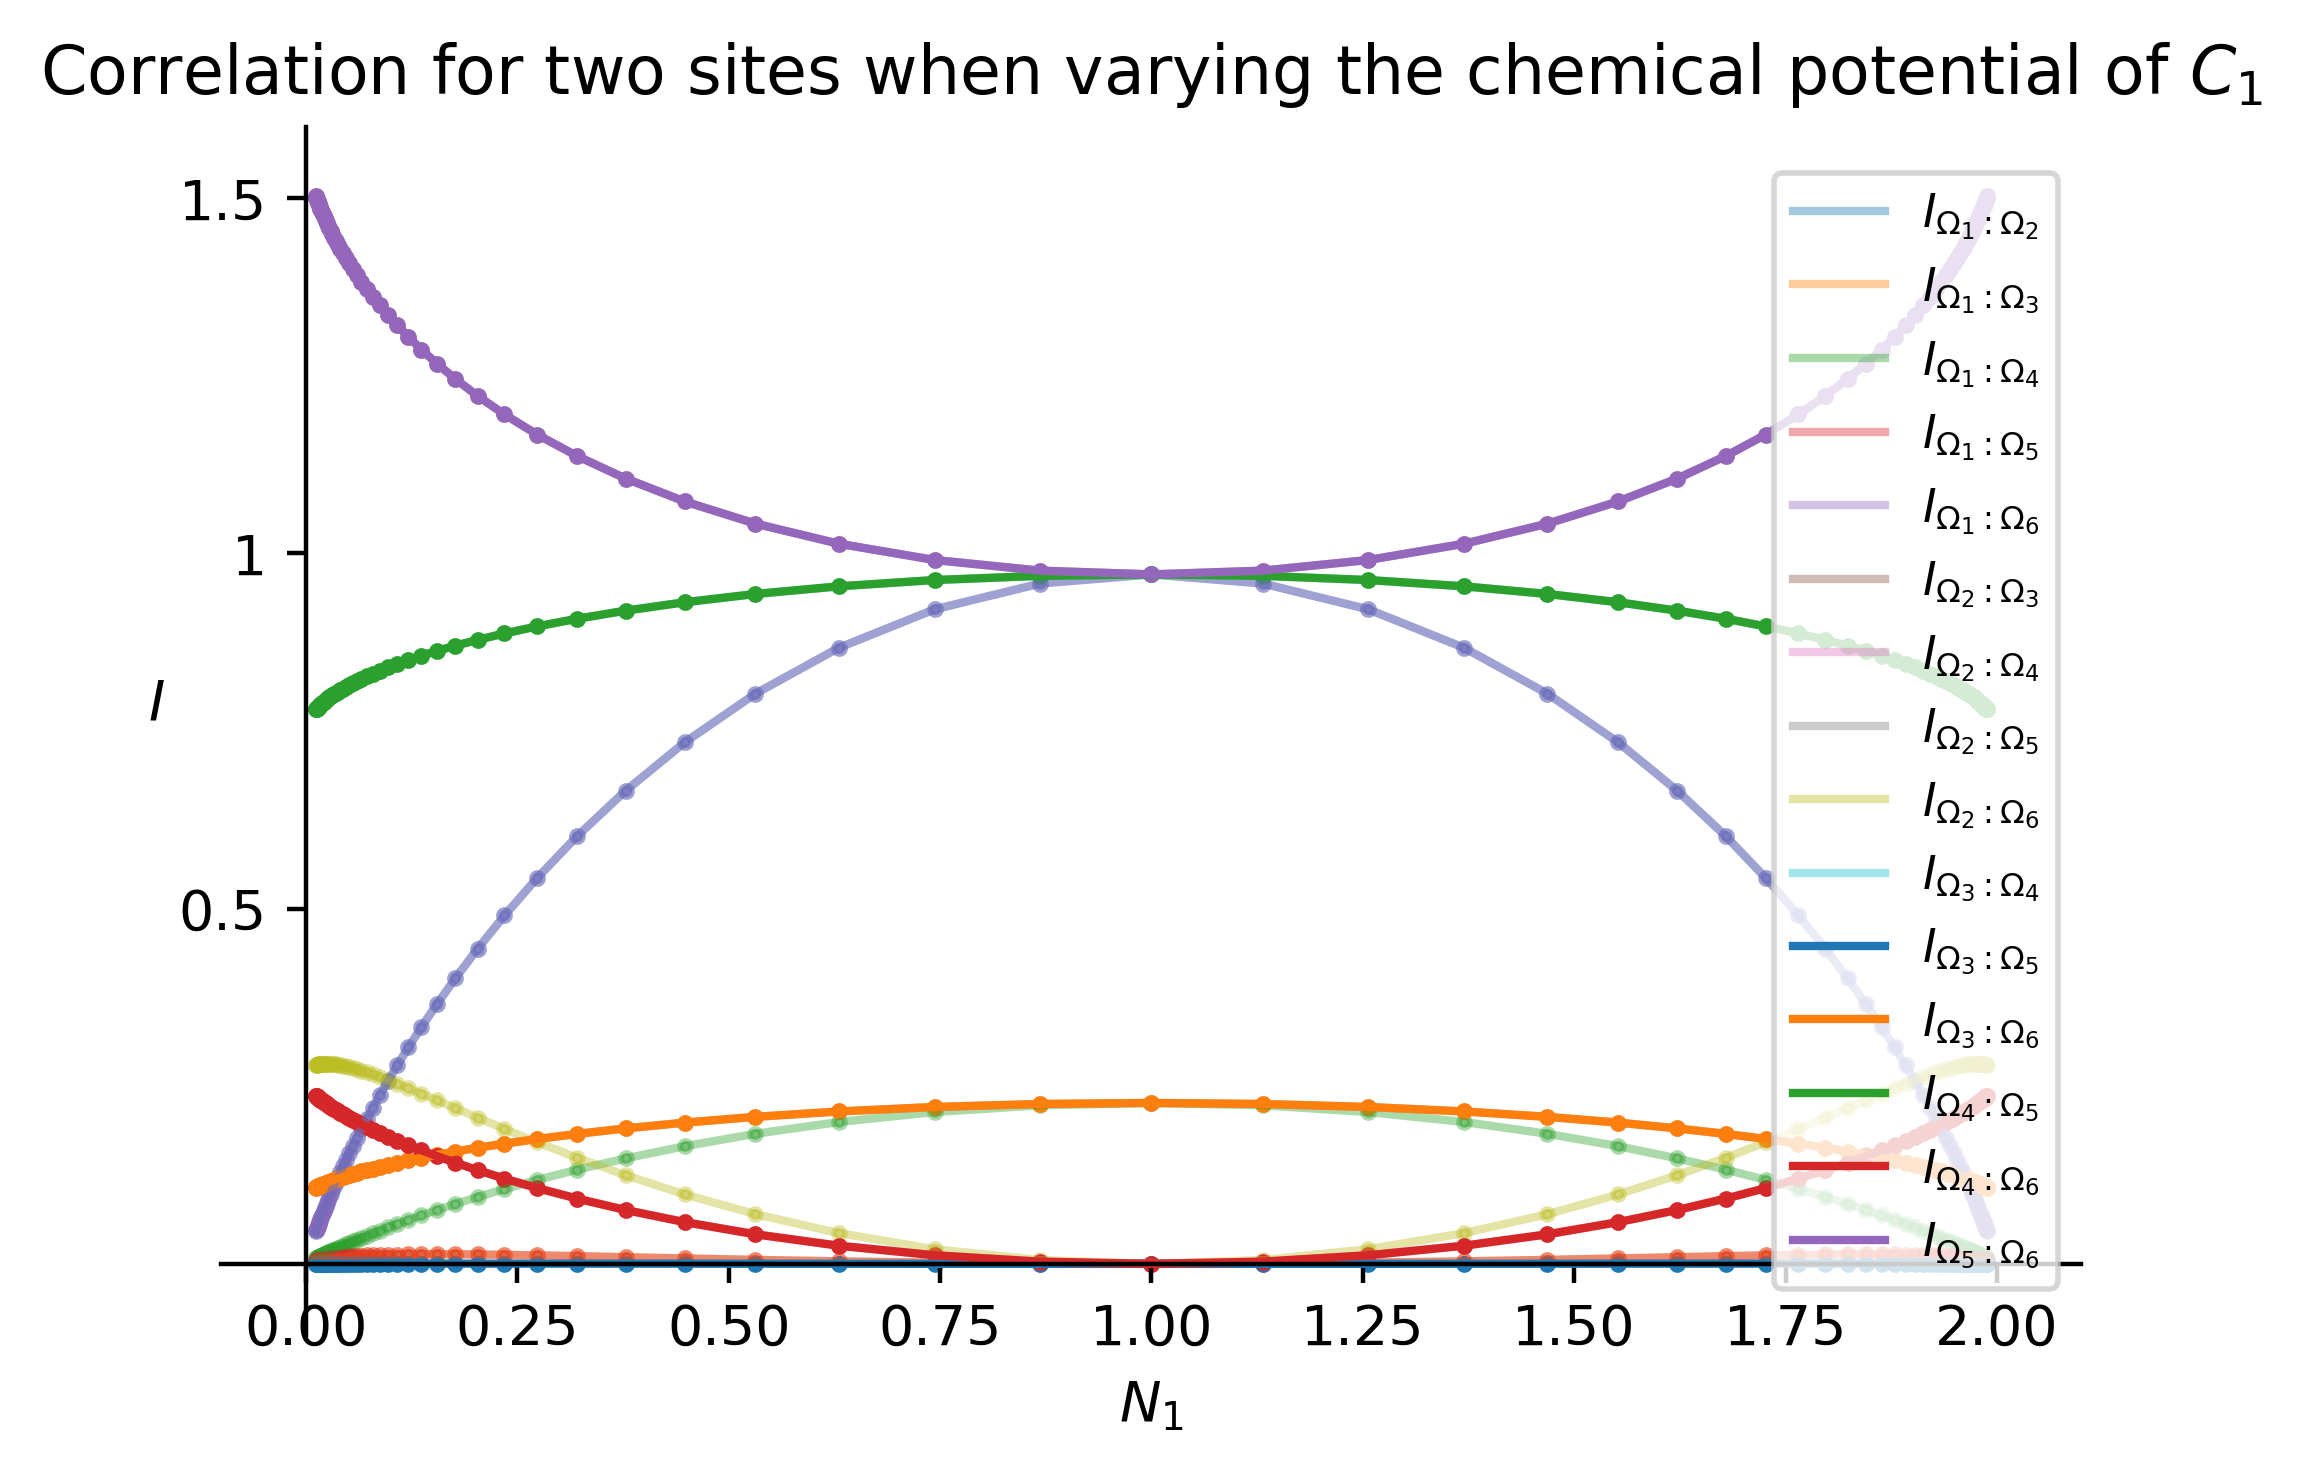

In [12]:
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi= 400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-0.1, 2.1)
ax.set_ylim(-0.1, 1.6)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([0.5, 1, 1.5])
ax.set_yticklabels(['0.5', '1', '1.5'])


# Plot de gegevens
index = 0
for i in range(6):
    for j in range(i+1, 6):
        if index >9:
            alpha = 1
        else:
            alpha = 0.4
        atoms = (str(i+1),str(j+1))
        plt.plot(electron_population[0], [S_1_atom[k][i] + S_1_atom[k][j] - sublijst[index] for  k, sublijst in enumerate(S_2_atoms)], alpha = alpha, label=r'$I_{Ω_{%s}: Ω_{%s}}$' %atoms)
        plt.scatter(electron_population[0], [S_1_atom[k][i] + S_1_atom[k][j] - sublijst[index] for  k, sublijst in enumerate(S_2_atoms)], s=4, alpha = alpha)
        index+=1
        
# Benoem de assen en titel 
plt.title('Correlation for two sites when varying the chemical potential of $C_1$')
ax.set_xlabel('$N_1$')
ax.set_ylabel('$I$', rotation=0)

# Legenda
plt.legend(fontsize='small',loc = 'right')

# Toon de plot
plt.show()


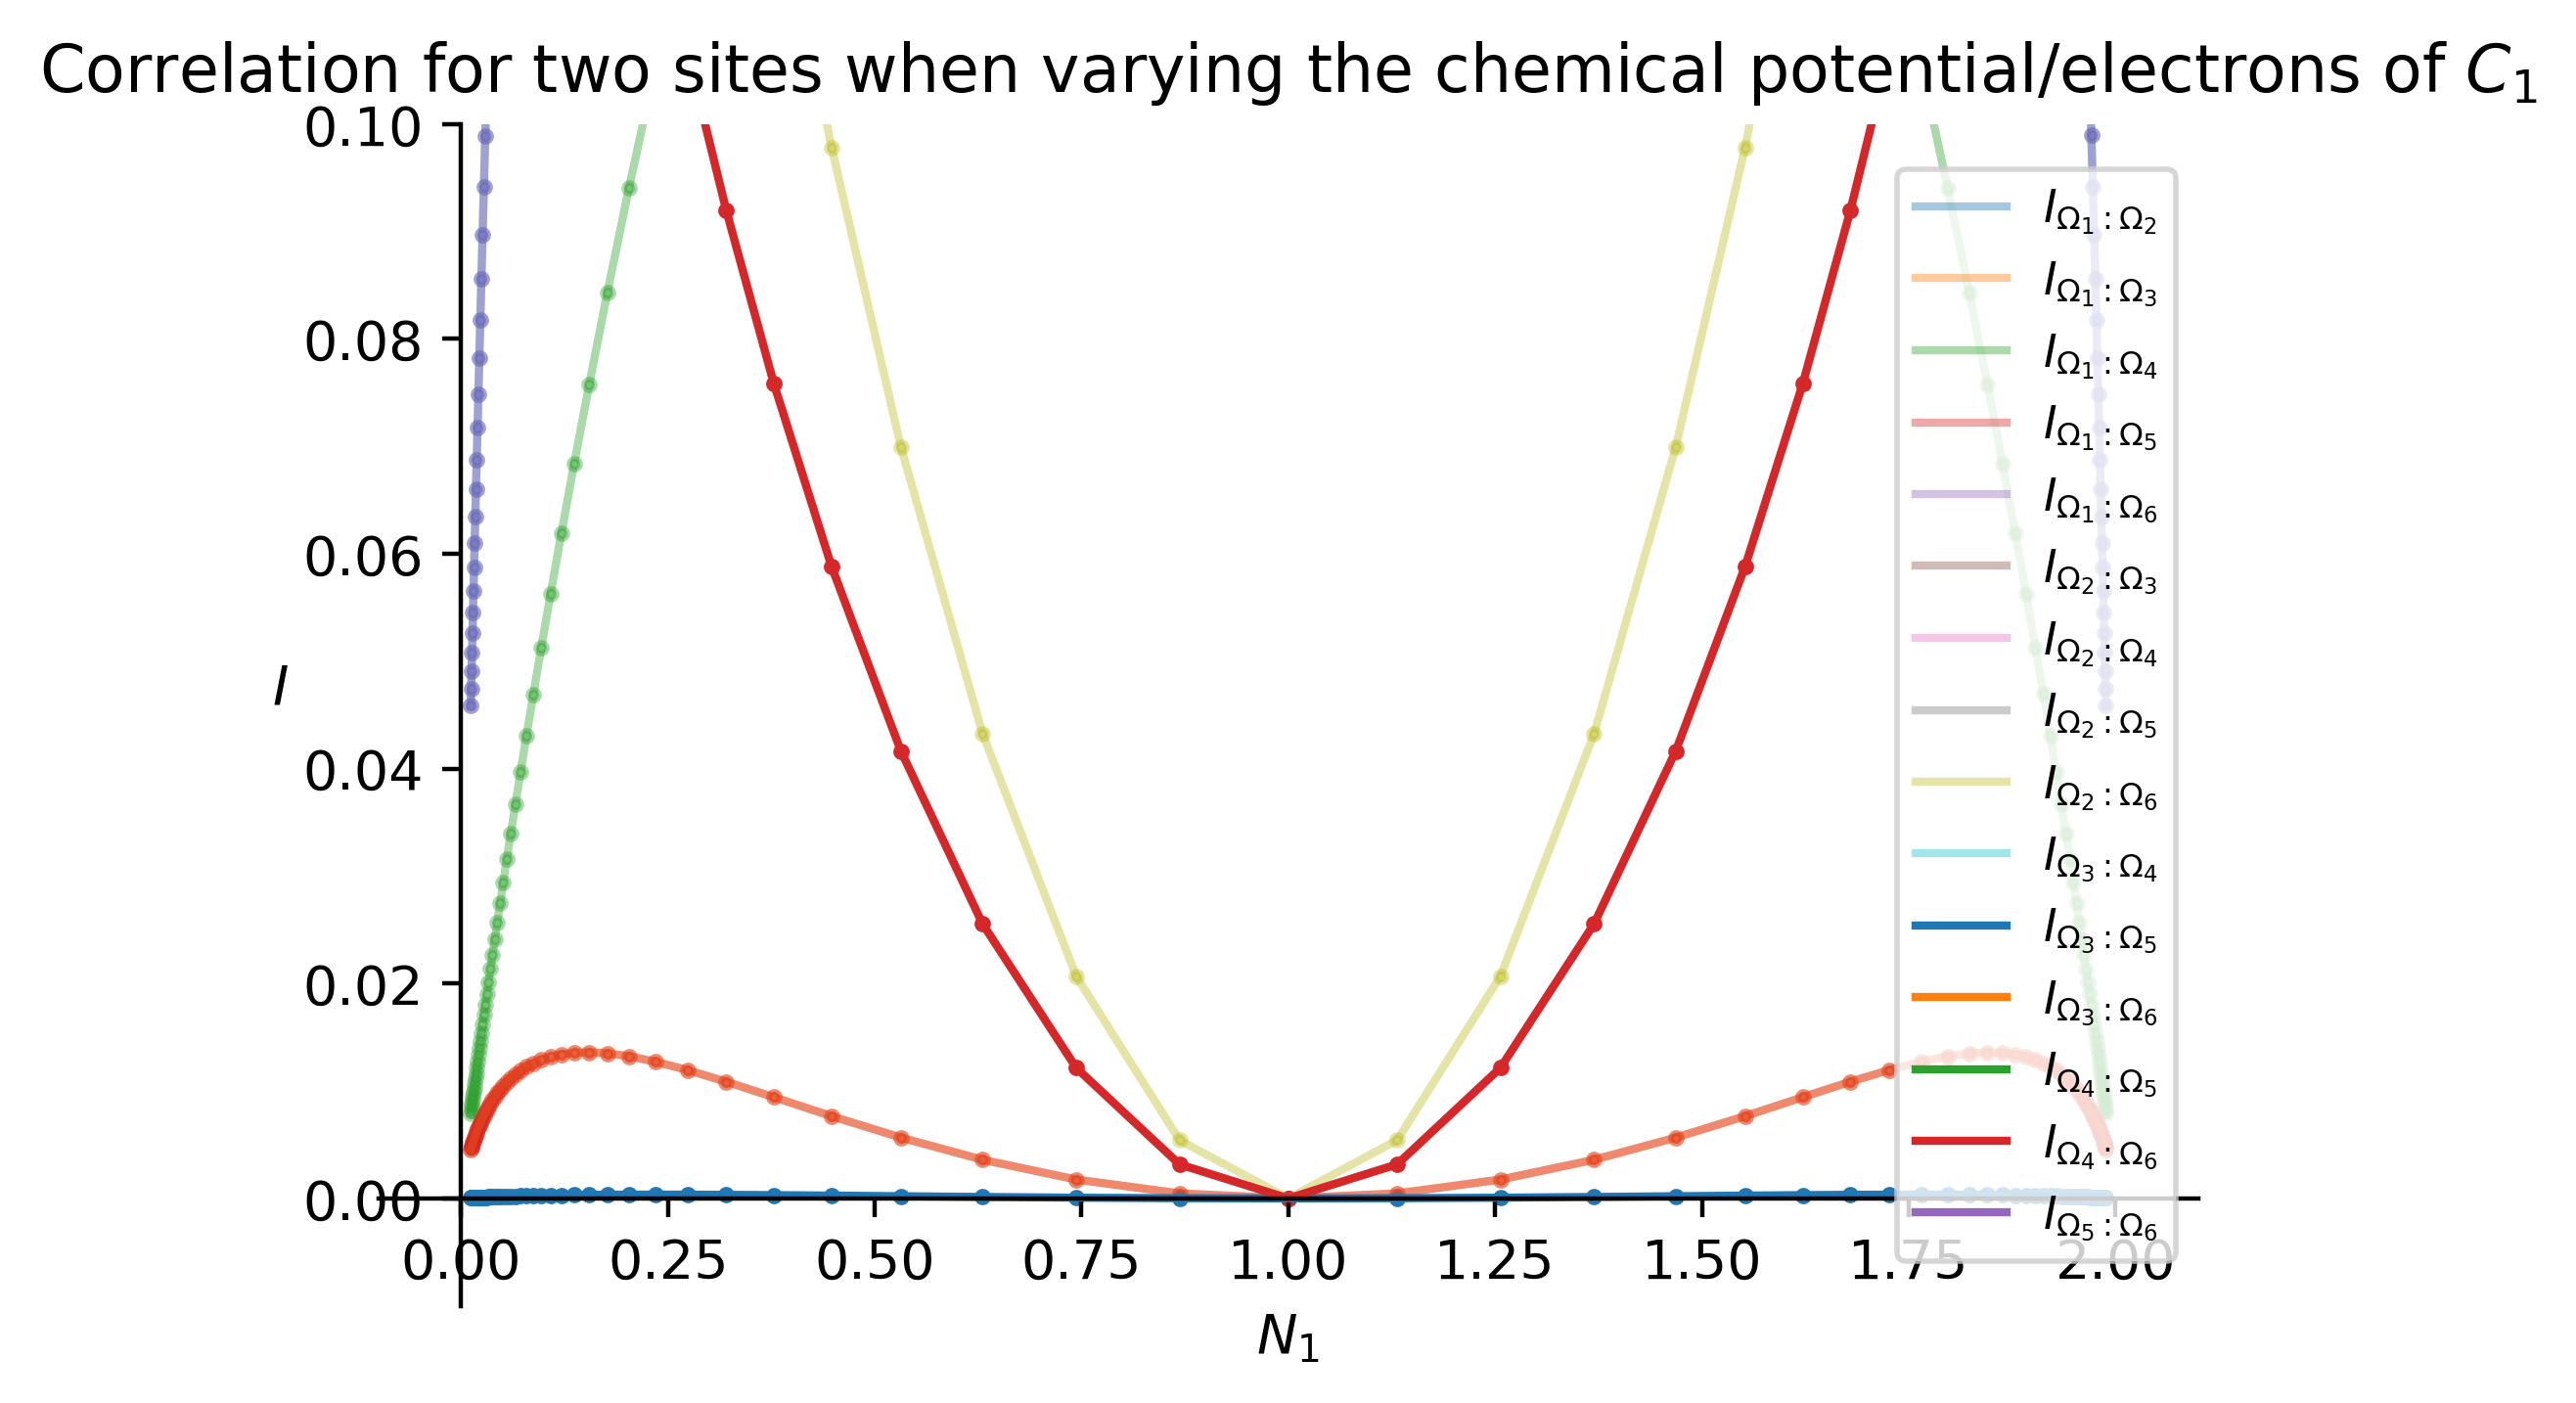

In [13]:
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi= 400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-0.1, 2.1)
ax.set_ylim(-0.01, 0.1)





# Plot de gegevens
index = 0
for i in range(6):
    for j in range(i+1, 6):
        if index >9:
            alpha = 1
        else:
            alpha = 0.4
        atoms = (str(i+1),str(j+1))
        plt.plot(electron_population[0], [S_1_atom[k][i] + S_1_atom[k][j] - sublijst[index] for  k, sublijst in enumerate(S_2_atoms)], alpha = alpha, label=r'$I_{Ω_{%s}: Ω_{%s}}$' %atoms)
        plt.scatter(electron_population[0], [S_1_atom[k][i] + S_1_atom[k][j] - sublijst[index] for  k, sublijst in enumerate(S_2_atoms)], s=4, alpha = alpha)
        index+=1
    
# Benoem de assen en titel 
plt.title('Correlation for two sites when varying the chemical potential/electrons of $C_1$')
ax.set_xlabel('$N_1$')
ax.set_ylabel('$I$', rotation=0)

# Legenda
plt.legend(fontsize='small',loc = 'right')

# Toon de plot
plt.show()


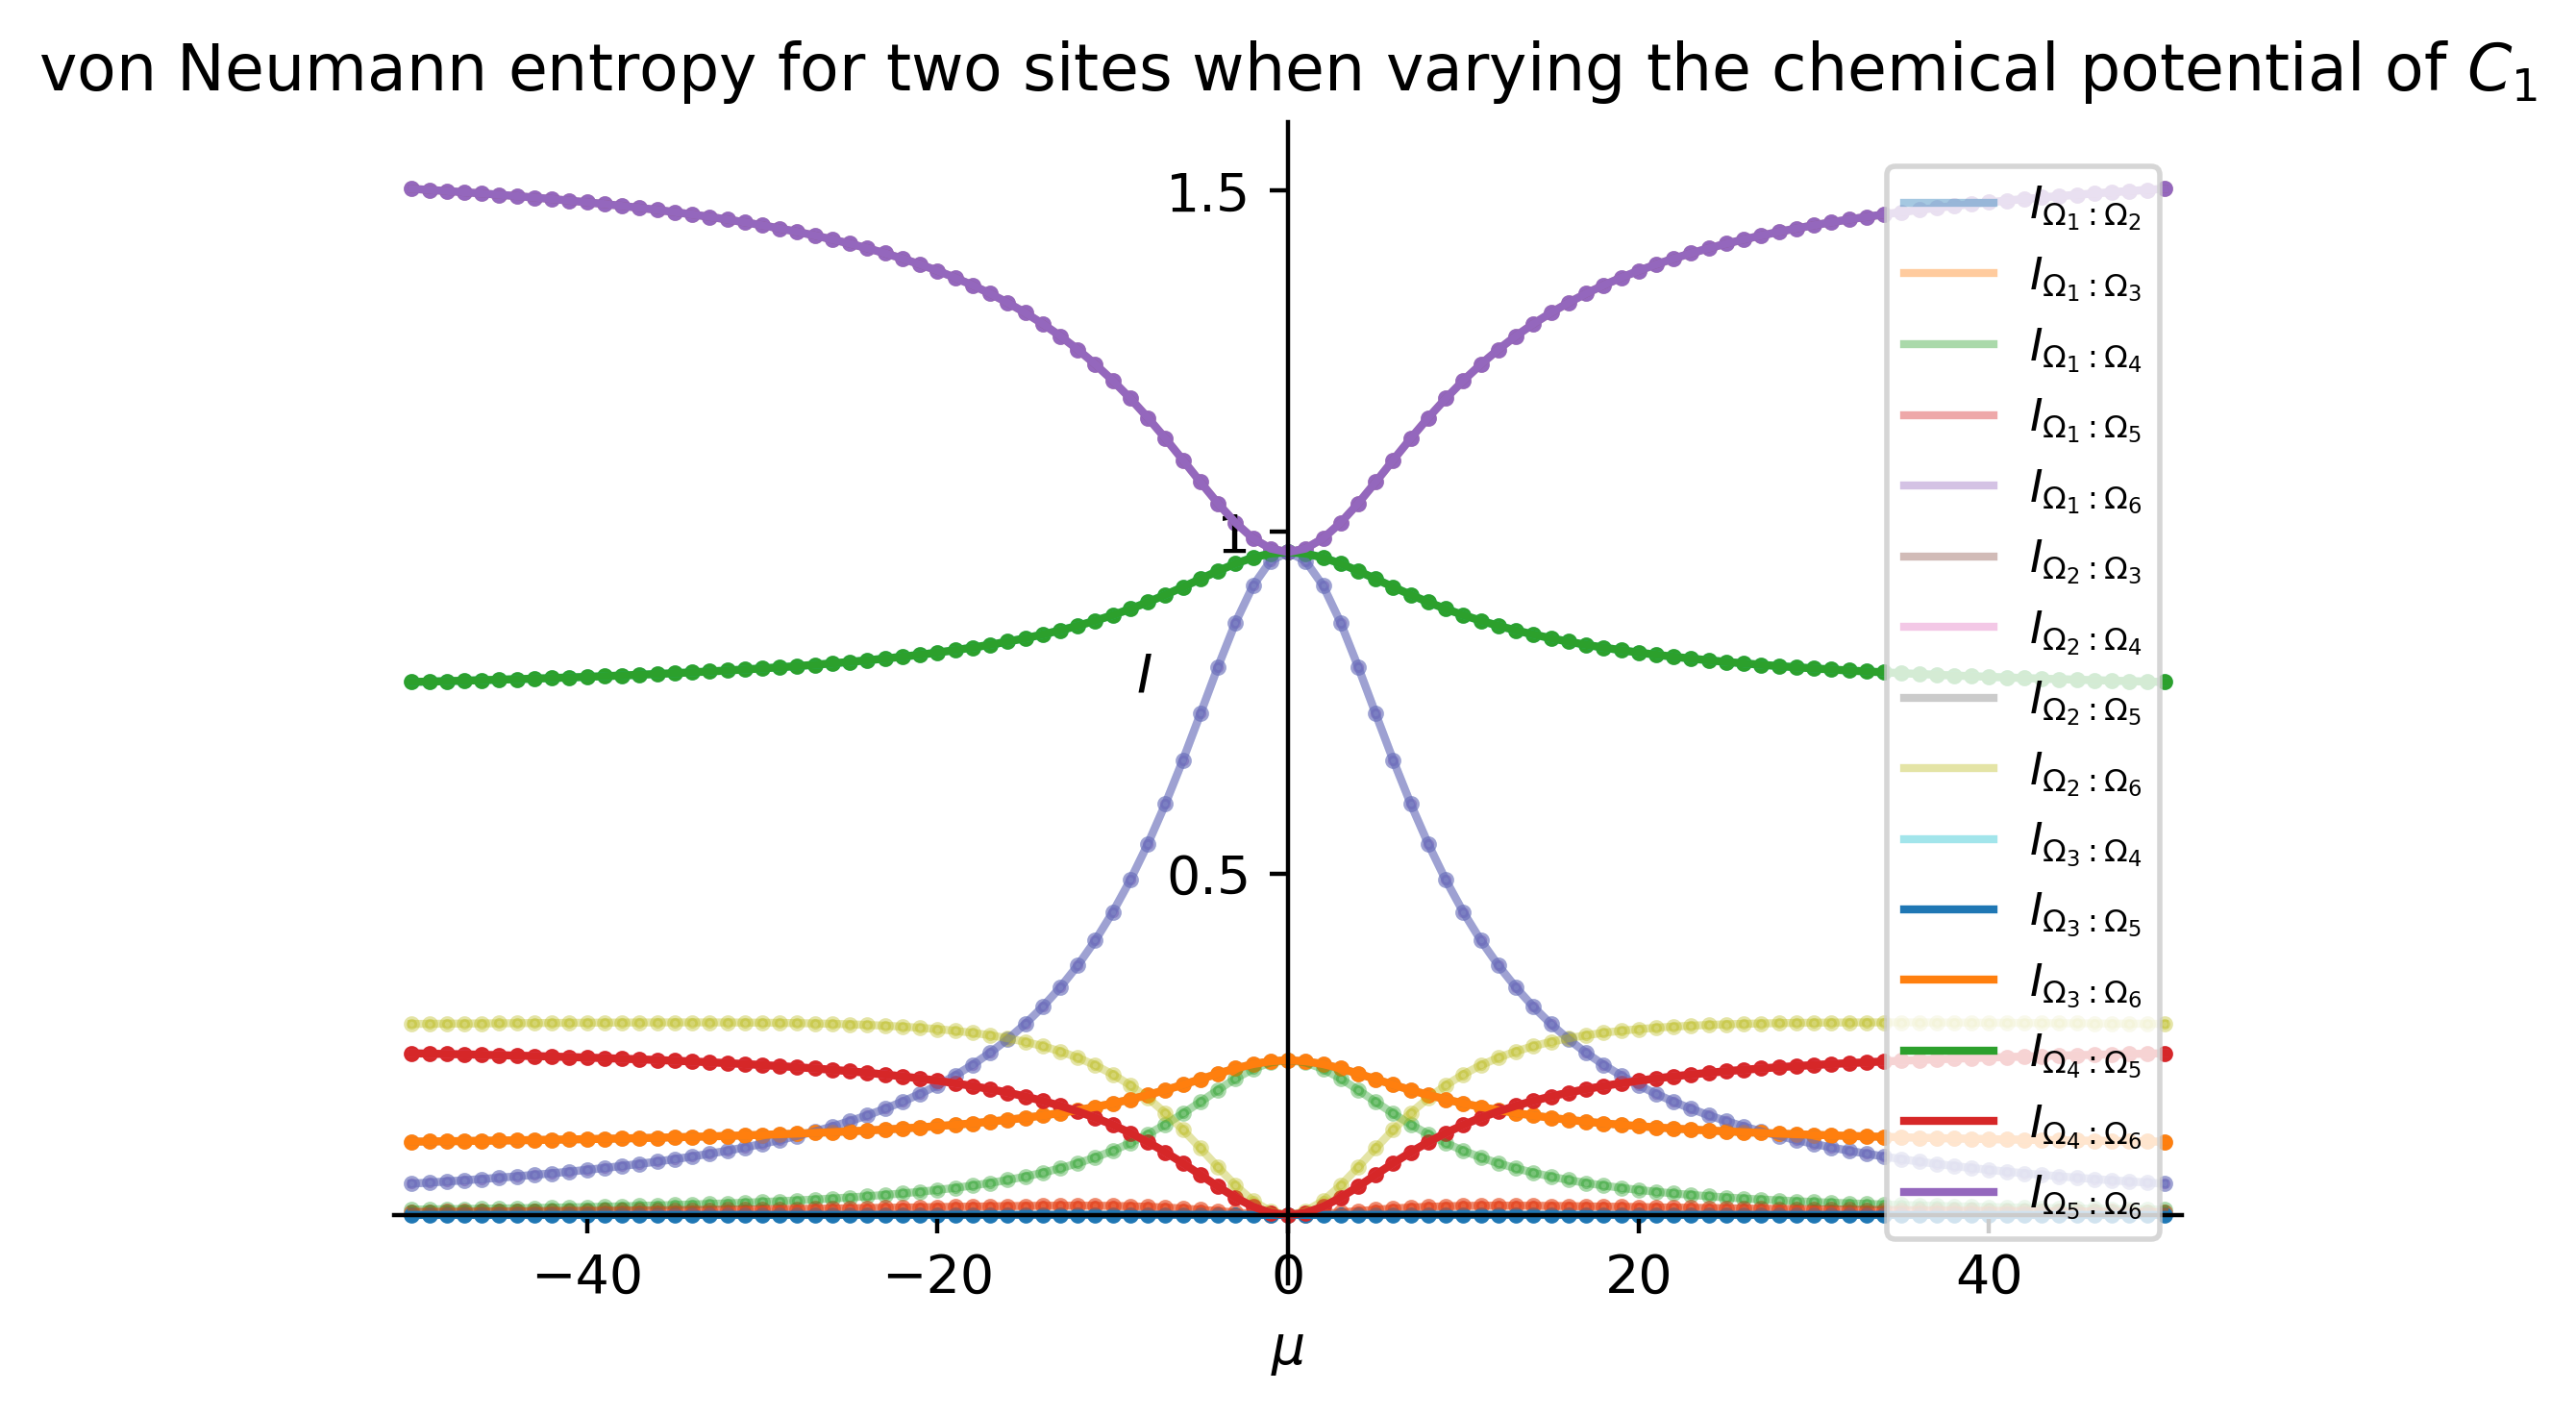

In [14]:
# Maak een nieuwe figuur en assen
fig, ax = plt.subplots(dpi= 400)

# Verplaats de spines (assenlijnen) naar de oorsprong
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Stel de x- en y-limieten in
ax.set_xlim(-51, 51)
ax.set_ylim(-0.1, 1.6)


# Stel de locaties en labels van de y-ticks in
ax.set_yticks([0.5, 1, 1.5])
ax.set_yticklabels(['0.5', '1', '1.5'])


# Plot de gegevens
index = 0
for i in range(6):
    for j in range(i+1, 6):
        if index >9:
            alpha = 1
        else:
            alpha = 0.4
        atoms = (str(i+1),str(j+1))
        plt.plot(potentials, [S_1_atom[k][i] + S_1_atom[k][j] - sublijst[index] for  k, sublijst in enumerate(S_2_atoms)], alpha = alpha, label=r'$I_{Ω_{%s}: Ω_{%s}}$' %atoms)
        plt.scatter(potentials, [S_1_atom[k][i] + S_1_atom[k][j] - sublijst[index] for  k, sublijst in enumerate(S_2_atoms)], s=4, alpha = alpha)
        index+=1
        
# Benoem de assen en titel 
plt.title('von Neumann entropy for two sites when varying the chemical potential of $C_1$')
ax.set_xlabel('$\mu$')
ax.set_ylabel('$I$', rotation=0)

# Legenda
plt.legend(fontsize='small',loc = 'right')

# Toon de plot
plt.show()
